# Single Cell - Shifted Signals

In [27]:
from matplotlib import pyplot as plt
from tifffile import TiffFile
from src.utils.coordinate_system import Dimensions
from src.utils.visualization.make_roi_axis_ticks import make_roi_axis_ticks


def rois_on_image(image_path: str, image_dims: Dimensions, colormap='gray', grid_line_color='yellow', frame_idx=0) -> plt.figure:
    # --- get the correct frame of the image ---
    with TiffFile(image_path) as tif:
        image = tif.pages[frame_idx].asarray()

    # --- show the image ---
    fig, ax = plt.subplots()
    
    ax.imshow(image,
              cmap=colormap,
              aspect='equal')

    # --- plot ROIs on top of image ---
    ax = make_roi_axis_ticks('both', ax, image_dims)

    minor_line_width = 2
    ax.grid(visible=True, which='major', linewidth=2, color=grid_line_color, linestyle=':')
    ax.grid(visible=True, which='minor', linewidth=minor_line_width, color=grid_line_color, linestyle=':')

    ax.set_xlabel('ROI x index')
    ax.set_ylabel('ROI y index')

    return fig


--- A: Load Image Data ---
load_image_data...
1198 frames have been detected.
0.0s

--- B: Compute ROIs ---
generate_rois_from_size...0.0s
save_imagej_rois...0.0s

single_cell.tif (image name)
ROI width, height: 32 x 32 px
A grid of 1 x 5 (horizontal x vertical) ROIs has been created. That makes 5 ROIs.


--- C: Get ROI signals ---
get_roi_signals...0.0s

--- D: Detrending ROI signals ---
detrend_signals...0.0s


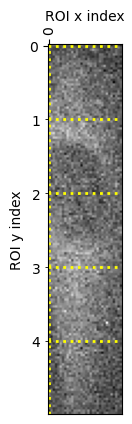

In [72]:
from src.B_generate_rois.save_imagej_rois import save_imagej_rois
# Load the data
import src.options as opt
from src.A_load_image_data.load_image_data import load_image_data
from src.C_get_ROI_signals.get_roi_signals import get_roi_signals
from src.D_detrend_signals.detrend_signals import detrend_signals
from src.utils.ROI import ROI
from src.B_generate_rois.generate_rois_from_size import generate_rois_from_size

# %%
print('--- A: Load Image Data ---')
n_frames_raw, img_dims, pixel_dtype = load_image_data(opt.image_path)

# %%
print('\n--- B: Compute ROIs ---')
all_rois = generate_rois_from_size(img_dims)
save_imagej_rois(all_rois)

# printing ROI / image information
print(f'\n{opt.image_name.split("/")[-1]} (image name)')
print(f'ROI width, height: {ROI.WIDTH_PIXELS} x {ROI.HEIGHT_PIXELS} px')
print(
    f"A grid of {ROI.N_HORIZONTAL} x {ROI.N_VERTICAL} (horizontal x vertical) ROIs has been created. That makes {ROI.N_HORIZONTAL * ROI.N_VERTICAL} ROIs.\n")

rois_on_image(opt.image_path, img_dims).savefig(opt.B_plot_rois_on_image_path, bbox_inches='tight')

# %%
print('\n--- C: Get ROI signals ---')
signals_arr, all_signals_df = get_roi_signals(opt.image_path, n_frames_raw, all_rois,
                                              opt.roi_signal_summary_statistic)

# %%
print('\n--- D: Detrending ROI signals ---')
detrended_signals_df, n_frames_detrended = detrend_signals(all_signals_df, opt.rolling_window_size)


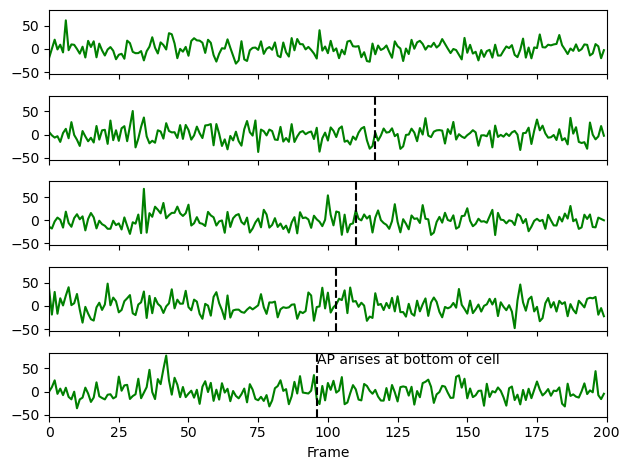

In [75]:
# make grid plot of signals
start, end = 0, 200
det_signals_cut = detrended_signals_df.iloc[start : end] # get first 200 frames

fig, ax = plt.subplots(nrows=5, ncols=1, sharex=True, sharey=True, 
                       # figsize=(8, 8) 
                       )
for i, roi in enumerate(det_signals_cut.columns):
    ax[i].plot(det_signals_cut[roi], color='green')
    ax[i].set_xlim(start, end)
    
    # ax[i].set_title(f'ROI {roi}')
ax[-1].set_xlabel('Frame')

# --- Make lines for AP ---
if True:
    # Draw a vertical line at x=66 on the bottom graph
    ax[-1].axvline(x=66+30, color='k', linestyle='--')
    
    # Add a label near the vertical line
    ax[-1].text(x=66+30, y=ax[-1].get_ylim()[1], s='AP arises at bottom of cell', rotation=0, verticalalignment='top')
    
    ax[-2].axvline(x=73+30, color='k', linestyle='--')
    ax[-3].axvline(x=80+30, color='k', linestyle='--')
    ax[-4].axvline(x=87+30, color='k', linestyle='--')


fig.tight_layout()